## Load tweets an perform some cleanin

In [1]:
import pandas as pd

df = pd.read_csv("../data/Bitcoin_tweets.csv")
df['hashtags']=df['hashtags'].apply(lambda s : s[1:-1].split(',') if isinstance(s,str) else [])
df.head(5)

C:\Users\marck\AppData\Local\Temp\ipykernel_17868\488120786.py:3: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/Bitcoin_tweets.csv")


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",[],Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


In [2]:
df['date']=pd.to_datetime(df['date'],errors='coerce')
df['date']=df['date'].apply(lambda x: x.date() )
df.head(5)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10,"Guys evening, I have read this article about B...",[],Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


## Perform sentiment analysis for each tweet

In [5]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df['text']]

In [21]:
df.to_csv('../data/tweets.csv')

In [4]:
df = pd.read_csv('../data/tweets.csv')
df.head(10)

C:\Users\marck\AppData\Local\Temp\ipykernel_17868\976875752.py:1: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/bitcoin_tweets.csv')


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False
5,ZerrBenz™ ⚔ ✪ 20732,"Bkk, Thailand",I'm a cat slave 🐱 Interested in Blockchain · T...,2010-01-12 07:00:04,742.0,716,2444,False,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,"['Crypto', 'Binance', 'Cashback']",Twitter Web App,False
6,Bitcoin-Bot,"Florida, USA",Bot to generate Bitcoin picture as combination...,2019-12-23 16:49:16,131.0,84,5728,False,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,"['Bitcoin', 'Crypto', 'BTC']",BTC_p_bot,False
7,Cryptocurrencies / EUR,NaN,Stay updated on the main cryptocurrencies of t...,2018-08-03 21:30:08,4052.0,1,9,False,2021-02-10 23:52:42,🔄 Prices update in $EUR (1 hour):\n\n$BTC - ...,NaN,Cryptocurrencies prices to EUR,False
8,Mikcoin,NaN,"Technical Analyst | Trader\n\nNo certainty, on...",2020-11-26 23:45:46,104.0,41,238,False,2021-02-10 23:52:25,#BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...,"['BTC', 'Bitcoin', 'Ethereum', 'ETH', 'Crypto'...",Twitter Web App,False
9,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:52:08,.@Tesla’s #bitcoin investment is revolutionary...,"['bitcoin', 'crypto']",Twitter Web App,False


## Create a dataframe with number of daily tweets

In [26]:
df_dists = df.groupby(['date']).agg(tweets_a_day=pd.NamedAgg(column="date", aggfunc="count"))
df_dists.head(5)

,tweets_a_day
date,
2021-02-05,1694
2021-02-06,3278
2021-02-07,3030
2021-02-08,5647
2021-02-09,4350


In [27]:
df_dists.to_csv('../data/tweets_a_day.csv')

In [3]:
df_day = pd.read_csv('../data/tweets_a_day.csv')
df_day.head(5)

,date,tweets_a_day
0,2021-02-05,1694
1,2021-02-06,3278
2,2021-02-07,3030
3,2021-02-08,5647
4,2021-02-09,4350


Text(0.5, 1.0, 'Daily Number Of Tweets')

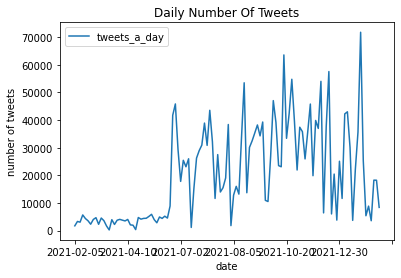

In [29]:
plt_tweets_dist = df_dists.plot.line()
plt_tweets_dist.set_ylabel('number of tweets')
plt_tweets_dist.set_title('Daily Number Of Tweets')

In [49]:
df_user_count_followers = df.groupby(['user_name']).agg(counts=pd.NamedAgg(column="user_name", aggfunc="count"), followers=pd.NamedAgg(column="user_followers", aggfunc="max"))
df_user_count_followers.reset_index(inplace=True)

In [50]:
df_user_count_followers = df_user_count.sort_values(by=['counts'], ascending=False)
df_user_count_followers.head(10)

,user_name,counts,followers
132632,Hoba Bot,13137,22115.0
45814,Bitcoin_Whale_Alert,11439,566.0
50454,Brett Murphy,11076,77764.0
45383,BitcoinAgile,9628,64836.0
45187,Bitcoin updates,7409,4622.0
358910,tictoknextblock,6421,203.0
65454,CoinOK,6329,10318.0
47250,BlockScan,5955,262.0
317765,brettmurphynet,5712,461.0
580,#Help Me Pay My Bills,5576,77516.0


In [53]:
df_user_count_followers.to_csv('../../user_counts.csv')

## Get bitcoin stock prices

In [10]:
import yfinance as yf
btc = yf.Ticker("BTC-USD")
btc_data = btc.history(period='max')
adjusted_btc =  btc_data.loc[min(df['date']) : max(df['date'])]
adjusted_btc.head(5)

C:\Users\marck\AppData\Local\Temp\ipykernel_728\1987469204.py:4: FutureWarning: Comparison of NaT with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable.
  adjusted_btc =  btc_data.loc[min(df['date']) : max(df['date'])]


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,58598066402,0,0
2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,71326033653,0,0
2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,65500641143,0,0
2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,101467222687,0,0
2021-02-09,46184.992188,48003.722656,45166.960938,46481.105469,91809846886,0,0


Text(0.5, 1.0, 'Bitcoin Closing Value')

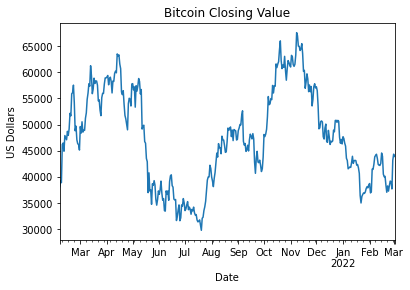

In [11]:
plt = adjusted_btc['Close'].plot.line()
plt.set_ylabel('US Dollars')
plt.set_title('Bitcoin Closing Value')

## count different hashtags

In [30]:
from collections import Counter
hashtag = df['hashtags'].to_list()
flat_list = [item.lower().lstrip().replace( "'", "") for sublist in hashtag for item in sublist]
counter =   dict(Counter(flat_list))

In [13]:
counter

{'bitcoin': 1821603,
 'thursday': 263,
 'btc': 1021677,
 'wallet': 1800,
 'security': 1800,
 'fx': 4191,
 'crypto': 556032,
 'binance': 197236,
 'cashback': 1177,
 'ethereum': 241444,
 'eth': 308232,
 'cryptotrading': 34005,
 'aave': 4852,
 'defi': 113499,
 'cryptocurrency': 335589,
 'tfuel': 685,
 'thetafuel': 55,
 'signaler': 21,
 'signal': 1214,
 'patience': 183,
 'ada': 60358,
 'adausdt': 287,
 'adacoin': 686,
 'nasdaq': 2673,
 'dot': 17917,
 'digital': 3170,
 'asset': 243,
 'fund': 112,
 'bitcoincash': 8930,
 'litecoin': 19709,
 'dogecoin': 97249,
 'xrp': 70270,
 'cybersecurity': 3922,
 'blockchain': 163499,
 'mailey': 78,
 'bnb': 211106,
 'ltc': 21812,
 'link': 9206,
 'doge': 109322,
 'bch': 15553,
 'tesla': 9328,
 'cgash': 1,
 'telcoin': 1133,
 'kucoin': 8649,
 'forex': 27494,
 'forexsignals': 3721,
 'trading': 47789,
 'forextrader': 4337,
 'forextrade': 193,
 'tether': 12207,
 'usdt': 35198,
 'altcoin': 60072,
 'bullrun': 1792,
 'chainlink': 7753,
 'digitalcurrencyexchange': 2,

In [31]:
import csv
col_name=["Hashtag","Count"]
with open('../data/dict.csv', 'w', encoding="utf-8") as csv_file:  
    writer = csv.writer(csv_file)
    writer.writerow(col_name)
    for key, value in counter.items():
       writer.writerow([key, value])

In [33]:
df_hash = pd.read_csv("../data/hashtag_count.csv")

In [35]:
df_hash.sort_values(by=['Count'], ascending=False).head(20)

,Hashtag,Count
0,bitcoin,1821603
2,btc,1021677
6,crypto,556032
14,cryptocurrency,335589
10,eth,308232
9,ethereum,241444
160,bsc,227953
35,bnb,211106
7,binance,197236
183,airdrop,191306


In [ ]:
# df_user.to_csv('../data/user_count.csv', index=False)

In [ ]:
# df_test = pd.read_csv('../data/user_count.csv')

In [ ]:
# df_test

In [15]:
df_date = pd.DataFrame(df.date.value_counts())

In [16]:
df_date

,date
2022-01-22,71805
2021-10-19,63590
2021-11-26,57572
2021-10-22,54775
2021-11-19,54023
...,...
2021-02-05,1694
2021-02-28,1634
2021-07-16,1110
2021-04-17,333


In [11]:
df_sentiments = pd.read_csv('../data/avg_sentiment.csv')
df_sentiments = df_sentiments.loc[:,'date':'compound']

In [39]:
df_sentiments.rename(columns={'date':'Date'}, inplace=True)

In [35]:
df_stock = pd.read_csv('../data/Bitcoin_kurs.csv')
df_stock = df_stock[['Date','Close']]
df_stock.head(10)

,Date,Close
0,2014-09-17,355.957367
1,2014-09-18,328.539368
2,2014-09-19,307.761139
3,2014-09-20,318.758972
4,2014-09-21,310.632446
5,2014-09-22,312.958771
6,2014-09-23,339.189758
7,2014-09-24,331.250000
8,2014-09-25,322.676605
9,2014-09-26,318.896851


Get daily difference

In [36]:
stock_price = df_stock['Close']
diff = []
for index, value in stock_price.items():
    if index < len(stock_price)-1:
        diff.append(value - stock_price[index+1])
diff = pd.Series(diff)
diff = diff.rename('diff')
df_stock = pd.concat([df_stock,diff],axis=1)
df_stock.tail(10)

,Date,Close,diff
2737,2022-03-16,37329.640625,433.675781
2738,2022-03-17,36895.964844,-881.160156
2739,2022-03-18,37777.125000,-352.003906
2740,2022-03-19,38129.128906,776.089843
2741,2022-03-20,37353.039063,66.539063
2742,2022-03-21,37286.500000,-1118.367188
2743,2022-03-22,38404.867188,-568.445312
2744,2022-03-23,38973.312500,-959.964844
2745,2022-03-24,39933.277344,-797.996094
2746,2022-03-25,40731.273438,NaN


In [40]:
sentiment_diff = pd.merge(df_sentiments, df_stock,how='inner', on='Date')

In [42]:
sentiment_diff.head(25)

,Date,compound,Close,diff
0,2021-02-05,0.125521,31658.248047,-930.224609
1,2021-02-06,0.129958,32588.472656,299.822265
2,2021-02-07,0.139586,32288.650391,-6041.017578
3,2021-02-08,0.157370,38329.667969,-32.628906
4,2021-02-09,0.149422,38362.296875,1297.250000
5,2021-02-10,0.158262,37065.046875,-2429.394531
6,2021-02-13,0.148022,38864.359375,-1329.695313
7,2021-02-14,0.256153,40194.054688,675.246094
8,2021-02-15,0.329345,39518.808594,-1181.933594
9,2021-02-18,0.154621,42739.449219,-3379.550781


In [43]:
sentiment_diff.to_csv('../data/sentiment_diff.csv')